# Smart Planning : appreciation model (v1) - Neural nets with scikit

 
### Details 

- Problem : `Regression`

- dataset : 'dataset4'


- Models :
    * TensorFlow Ann
    
    
- label : numeric in the interval [0,10]




<br>

In [1]:
!pip install tensorflow 

In [2]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to c:\users\ubmag\appdata\local\temp\pip-req-build-tesgho45
  Resolved https://github.com/tensorflow/docs to commit df2261fb31b07753e63d70a1c27c92464c7c787b


  Running command git clone -q https://github.com/tensorflow/docs 'C:\Users\ubmag\AppData\Local\Temp\pip-req-build-tesgho45'


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn import metrics, model_selection
import math
from sklearn.model_selection import train_test_split
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling

%matplotlib inline

# Get the dataset

In [139]:
df = pd.read_excel("dataset5.xlsx")
df.head()

,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
0,98,95,94,98,99,96,95,94,99,98,99,0
1,100,93,92,94,97,99,94,98,94,100,99,0
2,91,99,91,91,93,95,95,100,96,90,94,1
3,99,100,91,99,95,95,92,94,97,91,96,0
4,94,92,92,91,95,91,91,99,99,100,91,1


<br>

# Insights about the dataset


In [140]:

print("# DataSet shape : ", df.shape)
df.describe()

# DataSet shape :  (417, 12)


,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
count,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000,417.000000
mean,35.119904,33.827338,33.793765,32.736211,34.973621,34.270983,33.407674,33.290168,33.659472,33.685851,34.047962,5.088729
std,32.351436,32.977832,31.948135,31.436711,32.424495,31.959198,30.996305,31.840343,31.753923,32.016066,32.471106,3.216438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,7.000000,8.000000,8.000000,7.000000,9.000000,9.000000,7.000000,8.000000,8.000000,7.000000,2.000000
50%,23.000000,20.000000,22.000000,20.000000,24.000000,23.000000,22.000000,21.000000,22.000000,22.000000,22.000000,5.000000
75%,55.000000,59.000000,53.000000,48.000000,58.000000,54.000000,51.000000,56.000000,51.000000,55.000000,55.000000,8.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,10.000000


## count Label values

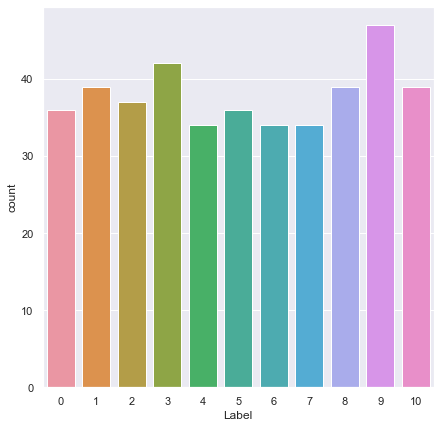

In [141]:
sn.countplot(x = 'Label',data = df)
plt.show()


<br> 

## features histogrames

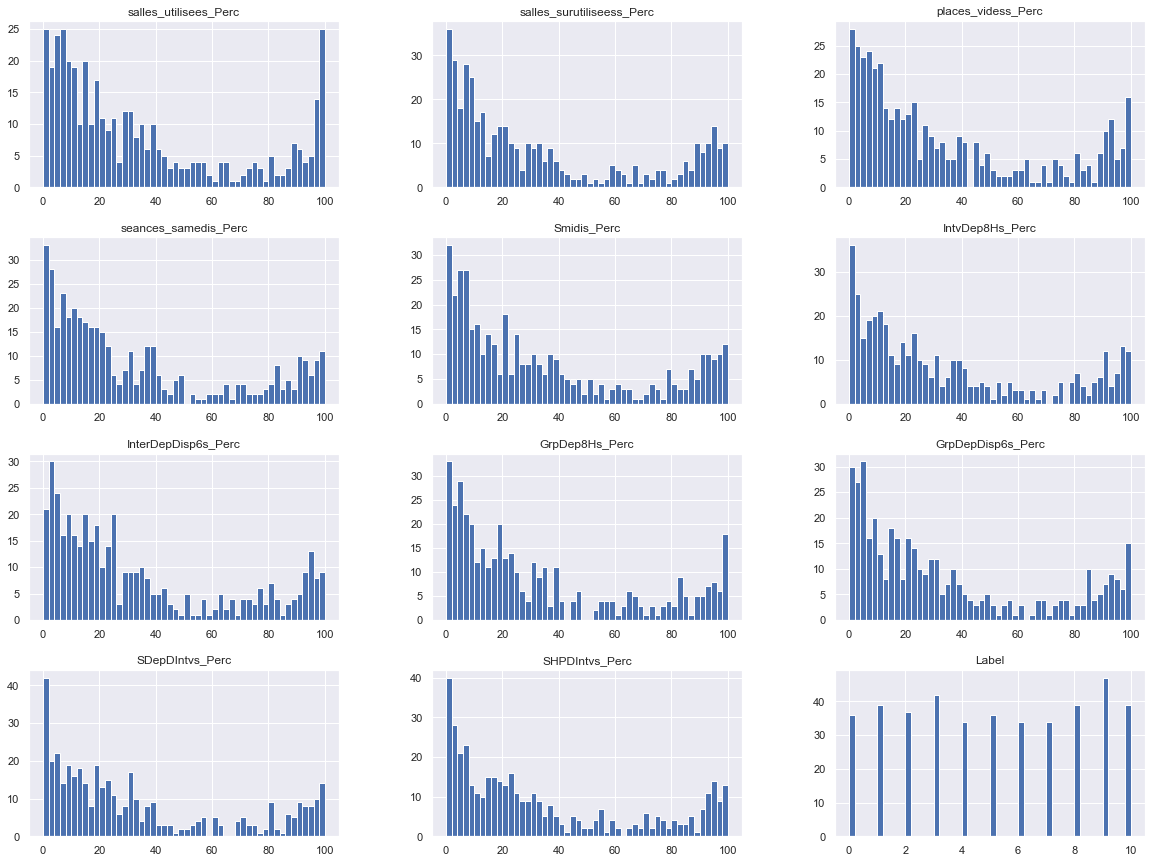

In [142]:
df.hist(bins=50, figsize=(20,15))
plt.show()

<br>

## SeaBorn pairplot : ploting each pair of features

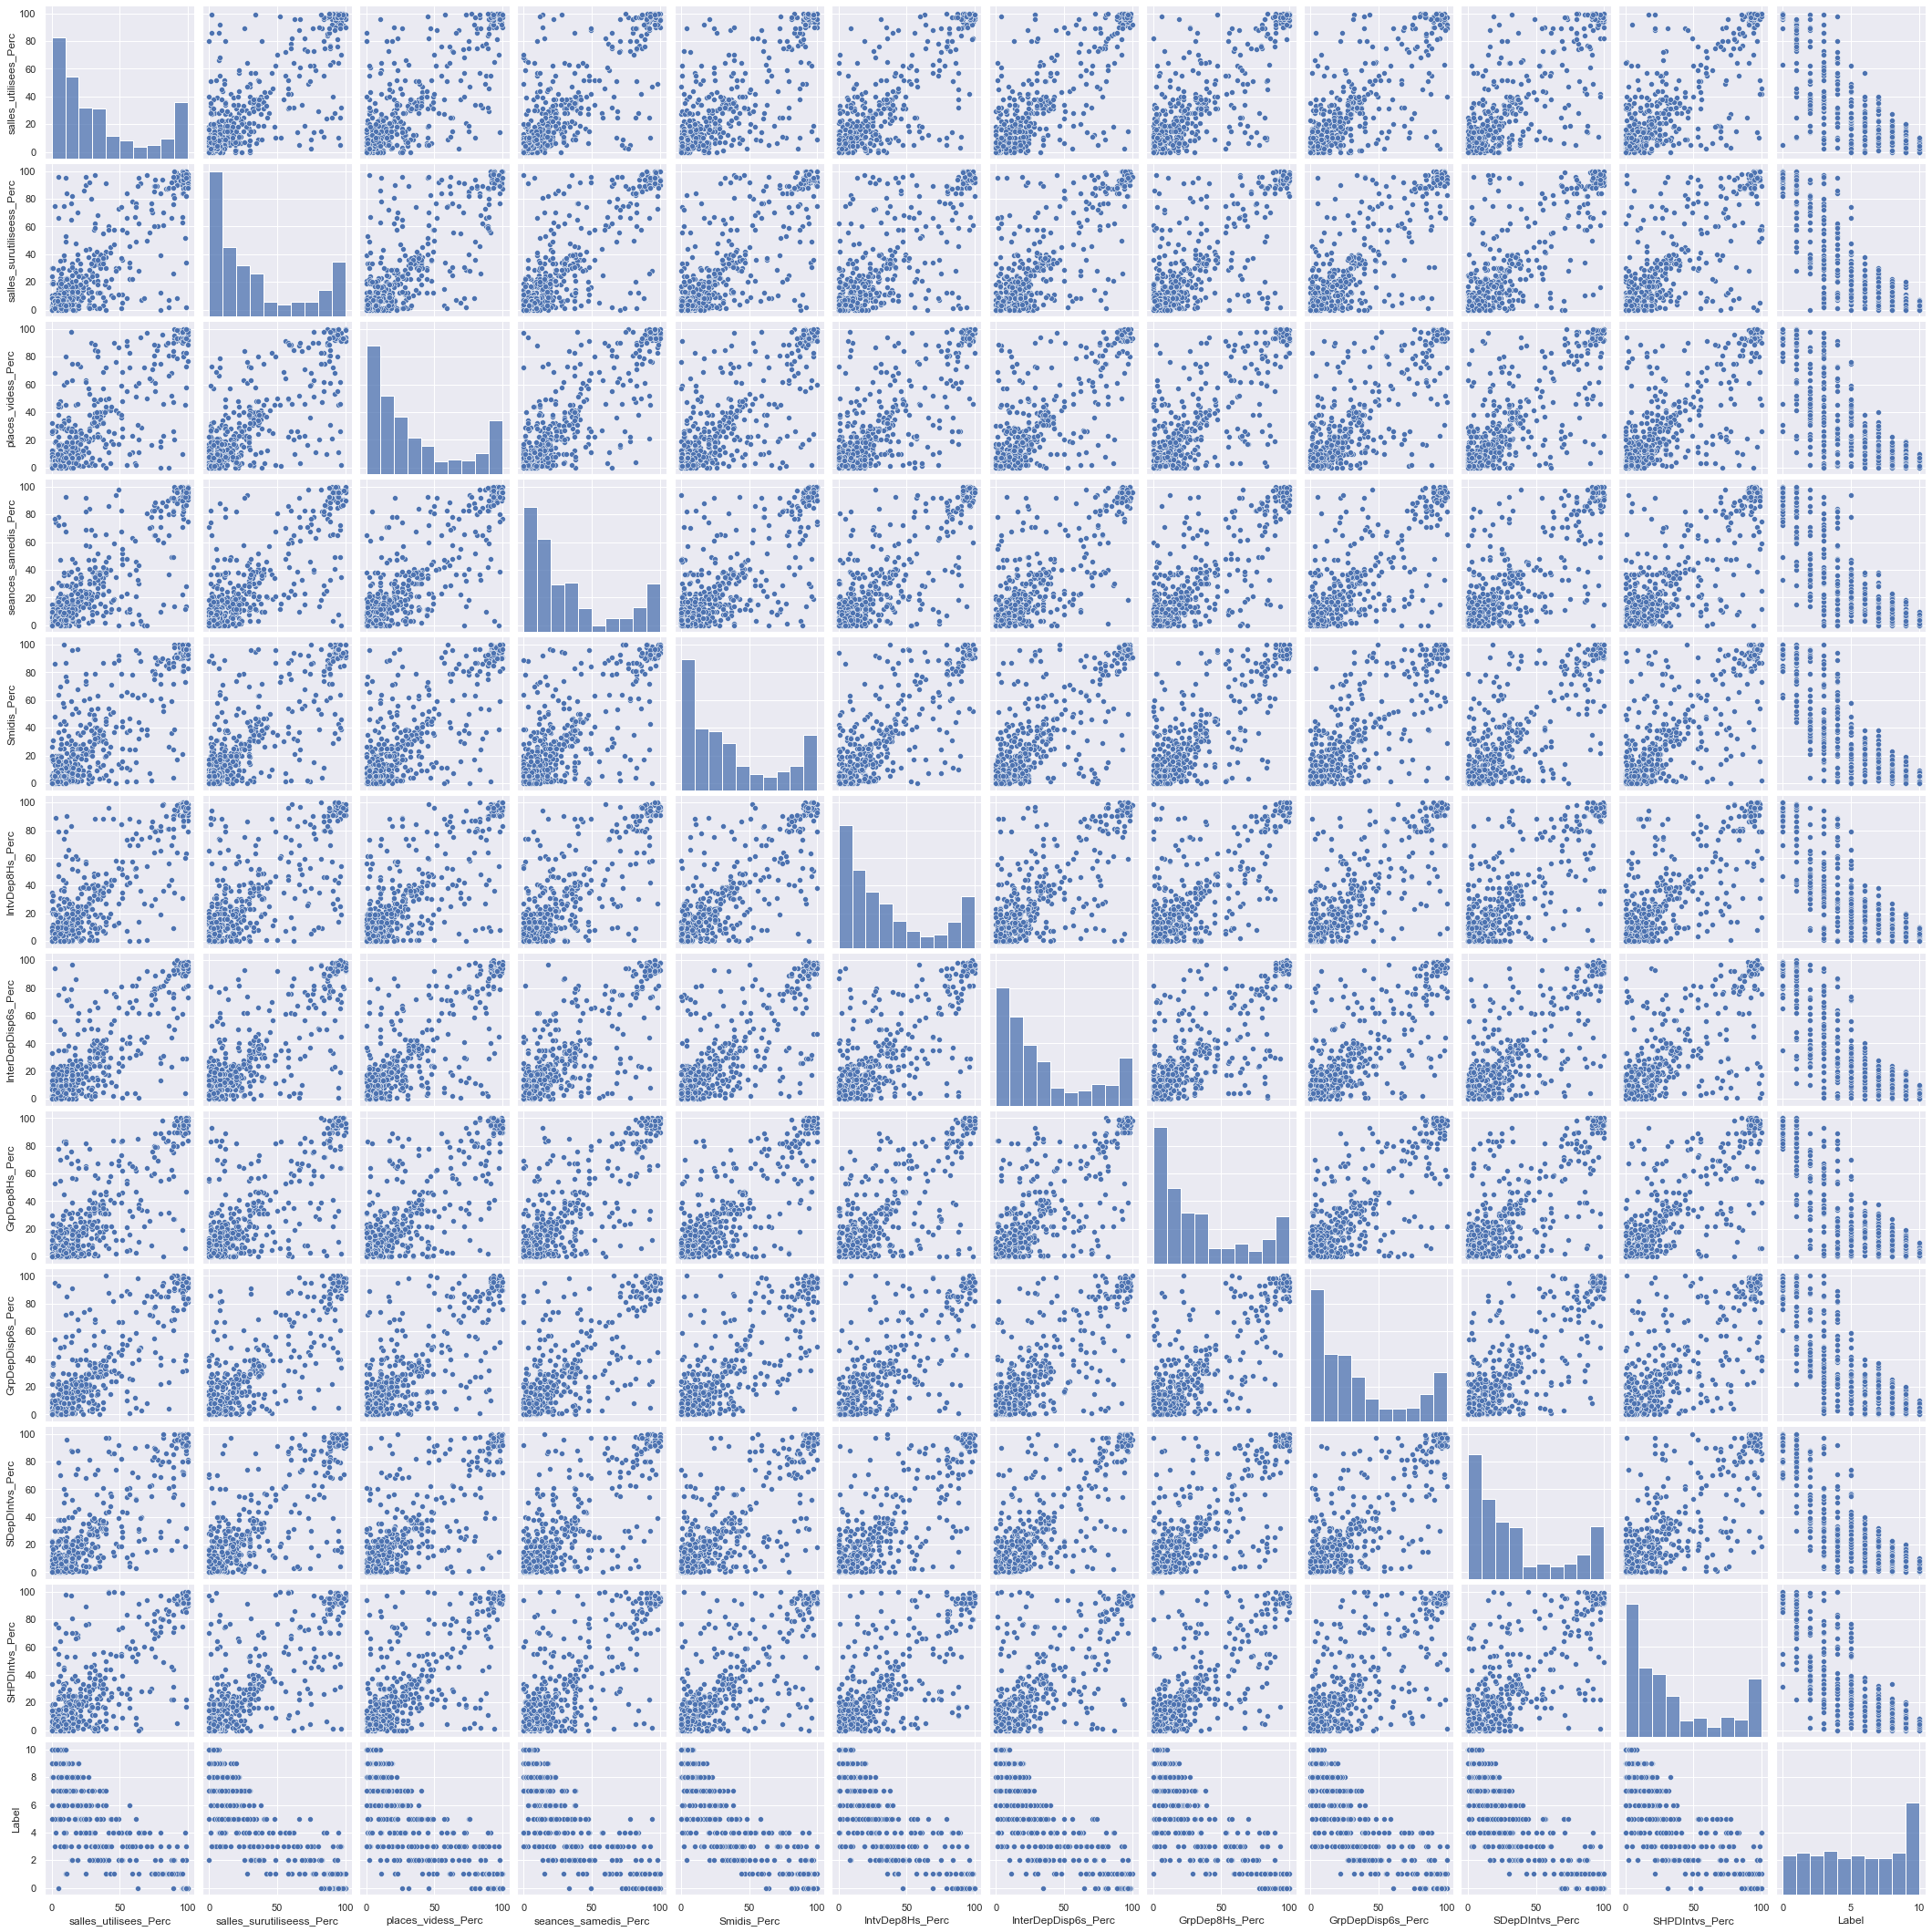

In [6]:
# Pairplot : better to open the image in a new tab
sn.set(rc = {'figure.figsize':(80,80)}) 
sn.pairplot(data = df) # same as the one before, here we can present 3 variables in the same graph, for example 'Label'
plt.show()            # Variable but using color (intensity?) hue; added the argument hue="Label" to pairplot()

<br>

## Correlation HeatMap (Matrix)

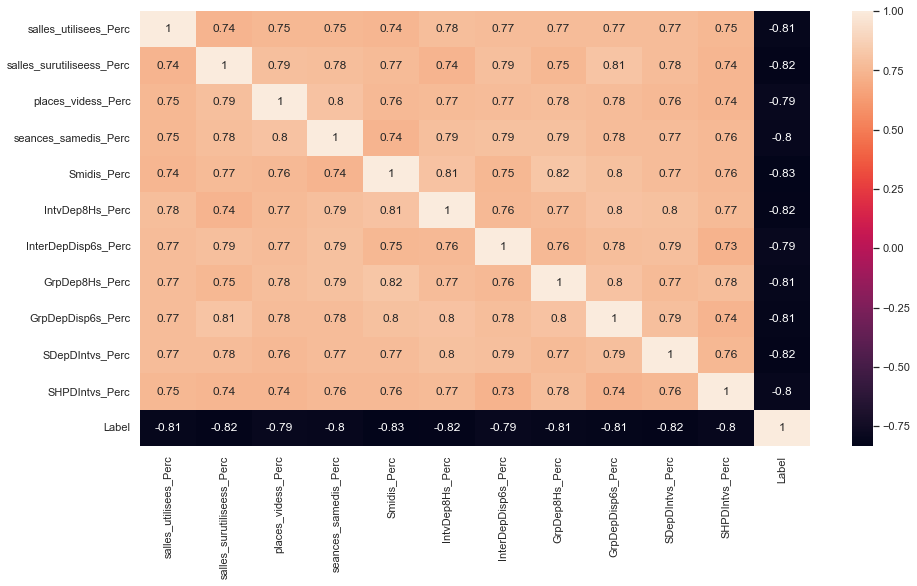

In [143]:
corr_mat = df.corr()
sn.set(rc = {'figure.figsize':(15,8)})
sn.heatmap(corr_mat, annot=True)
plt.show() 

<br>

# Splitting the dataset : stratified splitting

In [144]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.1, random_state=77 )
for train_index, test_index in split.split(df, df["Label"]):
    train_set = df.loc[train_index]
    test_set = df.loc[test_index]


print("# DataSet shape : ", df.shape)
print("# trainning_set shape : ", train_set.shape)
print("# test_set shape  20% : ", test_set.shape)


X_train = train_set.iloc[:,0:12]
Y_train = train_set[['Label']]


X_test = test_set.iloc[:,0:12]
Y_test = test_set[['Label']]

column_names = list(test_set.columns)

X_train.head()

# DataSet shape :  (417, 12)
# trainning_set shape :  (375, 12)
# test_set shape  20% :  (42, 12)


,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label
172,27,12,19,2,5,38,24,9,30,28,32,7
363,73,72,16,71,2,26,75,8,85,55,30,3
281,15,20,7,12,2,1,14,6,1,10,14,9
270,16,0,4,18,7,5,9,2,2,16,0,9
405,8,0,7,3,5,3,3,8,4,4,9,9


## stratified splitting result

In [145]:
# Stratified splitting : 
feature = 10

print(" '"+str(feature)+"' label in test set  : ",len(test_set[test_set['Label']==feature])/len(test_set) )
print(" '"+str(feature)+"' label in train set  : ",len(train_set[train_set['Label']==feature])/len(train_set) )

print(" '"+str(feature)+"' label in the main set df:  ", len(df[df['Label']==feature])/len(df))

# the two values are slightly the same, the difference is due to the small dataset i used  (same for other labels)

 '10' label in test set  :  0.09523809523809523
 '10' label in train set  :  0.09333333333333334
 '10' label in the main set df:   0.09352517985611511


<br>

# Create & trainning the model


In [146]:

# here he is, 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(2048, activation='relu'),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(36, activation='relu'),
    tf.keras.layers.Dense(12, activation='relu'),
    tf.keras.layers.Dense(1),
])

optimizer = tf.keras.optimizers.Adam()
model.compile( loss='mse', optimizer=optimizer, metrics=['mse', 'mae']  )

epochs=600

history = model.fit(  X_train, Y_train.values.ravel(), epochs=epochs, validation_split=0.15, verbose=0, callbacks=[ tfdocs.modeling.EpochDots() ]  )



X_test = test_set.iloc[:,0:12]
Y_test =  test_set[['Label']]
Y_pred = model.predict(X_test)
  



Epoch: 0, loss:39.6857,  mae:5.0773,  mse:39.6857,  val_loss:23.5513,  val_mae:4.0342,  val_mse:23.5513,  
....................................................................................................
Epoch: 100, loss:0.1894,  mae:0.3530,  mse:0.1894,  val_loss:0.9159,  val_mae:0.7515,  val_mse:0.9159,  
....................................................................................................
Epoch: 200, loss:0.1076,  mae:0.2541,  mse:0.1076,  val_loss:0.7217,  val_mae:0.6750,  val_mse:0.7217,  
....................................................................................................
Epoch: 300, loss:0.0597,  mae:0.1710,  mse:0.0597,  val_loss:0.7936,  val_mae:0.6955,  val_mse:0.7936,  
....................................................................................................
Epoch: 400, loss:0.0268,  mae:0.1013,  mse:0.0268,  val_loss:0.6676,  val_mae:0.6080,  val_mse:0.6676,  
....................................................................

<br>

# Testing set with model predictions

In [147]:

testing_set_with_predictions = test_set.copy()
testing_set_with_predictions["model_predictions"] = model.predict(test_set.iloc[:,0:12])
testing_set_with_predictions.head(8)


2/2 [==============================] - 0s 11ms/step


,salles_utilisees_Perc,salles_surutiliseess_Perc,places_videss_Perc,seances_samedis_Perc,Smidis_Perc,IntvDep8Hs_Perc,InterDepDisp6s_Perc,GrpDep8Hs_Perc,GrpDepDisp6s_Perc,SDepDIntvs_Perc,SHPDIntvs_Perc,Label,model_predictions
45,76,89,61,89,79,79,89,79,78,89,70,1,1.043980
344,52,5,69,55,16,31,1,84,67,25,99,3,3.676387
59,32,33,32,36,34,39,30,39,37,37,37,2,2.587761
198,14,16,28,10,12,25,14,28,25,7,22,7,6.319485
26,95,93,93,100,94,97,98,100,90,95,93,1,0.635340
306,0,8,10,9,5,6,7,8,2,9,3,9,9.914129
212,18,16,9,15,1,22,3,7,14,24,10,6,6.306592
385,57,34,10,12,47,69,45,16,54,4,59,4,2.294246


<br> 

# scatter predictions on a graph 

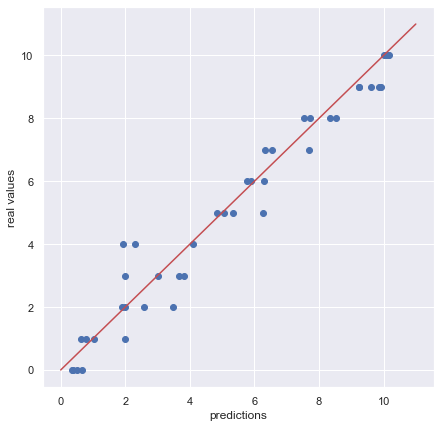

In [148]:
# this is a model's output with less epochs & layers
sn.set(rc = {'figure.figsize':(7,7)})
plt.xlabel('predictions')
plt.ylabel('real values')
plt.scatter( testing_set_with_predictions["model_predictions"], testing_set_with_predictions["Label"])
plt.plot( [i for i in range(12)], [i for i in range(12)], "r" )
plt.show()

<br>

# Manual inputs

In [151]:
seance_en_simultanite_perc = 0    # Pourcentage de séances avec contrainte de simultanéité
salles_utilisees_perc = 0         # Pourcentage de salles utilisées
salles_surutiliseess_Perc = 0     # Pourcentage de salles surutilisées (44Heures /Semaine)
places_videss_Perc = 0            #  Pourcentage de places vides
seances_samedis_Perc = 0           # Pourcentage de séances de samedi
Smidis_Perc = 0                    # Pourcentage de séances de midi 
IntvDep8Hs_Perc = 0                # Pourcentage d'intervenants qui depassent 8Heures /Jour
InterDepDisp6s_Perc = 0            # Pourcentage d'intervenants qui depassent le dispatchement 6Heures/Jour
GrpDep8Hs_Perc = 0                 # Pourcentage de groupes qui depassent 8Heures /Jour
GrpDepDisp6s_Perc = 0              # Pourcentage de groupes qui depassent le dispatchement 6Heures/Jour
SDepDIntvs_Perc = 0                # Pourcentage de séances hors préférences de disponibilités des intervenants
SHPDIntvs_Perc = 0                 # nombre de seances hors disponibilités d'intervenant

manual_testing_var = [ seance_en_simultanite_perc, salles_utilisees_perc, salles_surutiliseess_Perc, places_videss_Perc, seances_samedis_Perc, 
Smidis_Perc, IntvDep8Hs_Perc, InterDepDisp6s_Perc, GrpDep8Hs_Perc, GrpDepDisp6s_Perc, SDepDIntvs_Perc, SHPDIntvs_Perc]

In [152]:

pd.DataFrame({  
        'Model' : [ 
            ' Model',  
        ],
        'Score' : [ 
            model.predict([ manual_testing_var ])[0],
        ]})


1/1 [==============================] - 1s 1s/step


,Model,Score
0,Model,[9.866726]


<br>

# Storing & exporting the model



In [132]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_164 (Dense)           (None, 12)                156       
                                                                 
 dense_165 (Dense)           (None, 36)                468       
                                                                 
 dense_166 (Dense)           (None, 64)                2368      
                                                                 
 dense_167 (Dense)           (None, 128)               8320      
                                                                 
 dense_168 (Dense)           (None, 256)               33024     
                                                                 
 dense_169 (Dense)           (None, 512)               131584    
                                                                 
 dense_170 (Dense)           (None, 1024)            

In [ ]:
#perist it
model.save('model3.h5')


# load it
loaded_model = tf.keras.models.load_model('model3.h5')


In [ ]:
loaded_model.summary()